In [2]:
import pandas as pd


In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, roc_auc_score
import matplotlib.pyplot as plt

       Assay  Accuracy  Balanced Accuracy    Recall  Precision       AUC
0        1_1  0.710000           0.852041  1.000000   0.064516  0.806122
1      10_19  0.636364           0.813333  1.000000   0.066667  0.766667
2      10_20  0.437500           0.546448  0.666667   0.054054  0.366120
3    100_277  0.697674           0.767974  0.888889   0.400000  0.797386
4    100_278  0.755556           0.768319  0.812500   0.619048  0.778017
..       ...       ...                ...       ...        ...       ...
265     9_18  0.409091           0.638889  1.000000   0.235294  0.513889
266   90_256  0.717105           0.611486  0.500000   0.046512  0.652027
267   91_257  0.562500           0.661836  0.888889   0.380952  0.821256
268   92_258  0.562500           0.623377  0.818182   0.428571  0.714286
269   93_259  0.598425           0.520557  0.352941   0.292683  0.540164

[270 rows x 6 columns]


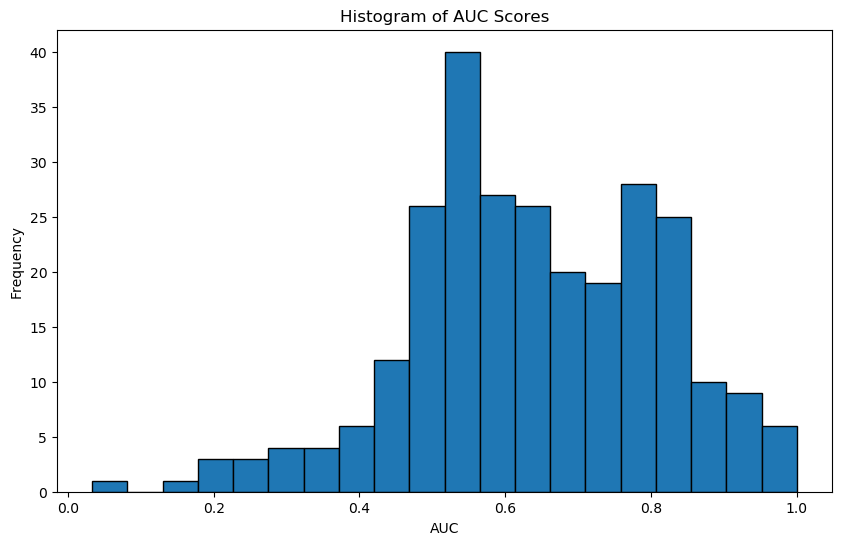

In [7]:
# Load the dataset
file_path = '../The_Moshkov_Files/CP_count_PUMA.csv'  # Update this with the actual file path
data = pd.read_csv(file_path)

# List of assay columns to process (assuming all columns except INCHIKEY and the last 13 columns are assays)
assay_columns = data.columns[1:-13]

# Initialize a list to store results
results = []

# Define a function to calculate a probability score based on the distance from the threshold
def calculate_probability_score(value, threshold=-10):
    return 1 / (1 + np.exp(value - threshold))



# Process each assay
for assay in assay_columns:
    # Drop rows with NaNs or -1s in the current assay column or in Cells_Number_Object_Number
    valid_data = data[(data[assay] != -1) & (data[assay].notna())].copy()
    
    # Calculate the probability score
    valid_data.loc[:, 'Probability_Score'] = valid_data['Cells_Number_Object_Number'].apply(calculate_probability_score)
    
    # True values for the assay
    true_values = valid_data[assay] == 1
    
    # Calculate metrics
    accuracy = accuracy_score(true_values, valid_data['Probability_Score'] >= 0.5)
    balanced_accuracy = balanced_accuracy_score(true_values, valid_data['Probability_Score'] >= 0.5)
    recall = recall_score(true_values, valid_data['Probability_Score'] >= 0.5)
    precision = precision_score(true_values, valid_data['Probability_Score'] >= 0.5)
    auc = roc_auc_score(true_values, valid_data['Probability_Score'])
    
    # Append the result
    results.append({
        'Assay': assay,
        'Accuracy': accuracy,
        'Balanced Accuracy': balanced_accuracy,
        'Recall': recall,
        'Precision': precision,
        'AUC': auc
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results DataFrame
print(results_df)

# Plot the histogram of AUC scores
plt.figure(figsize=(10, 6))
results_df['AUC'].hist(bins=20, edgecolor='black')
plt.title('Histogram of AUC Scores')
plt.xlabel('AUC')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


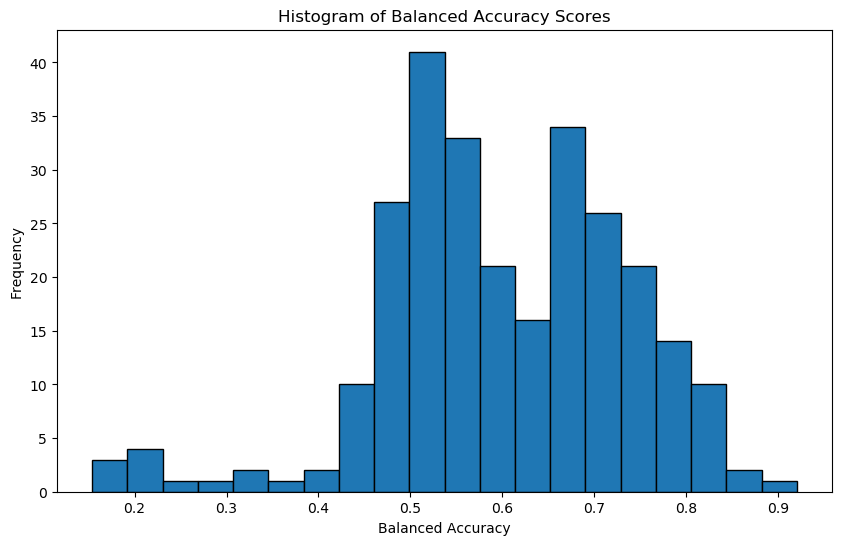

In [8]:
# Plot the histogram of AUC scores
plt.figure(figsize=(10, 6))
results_df['Balanced Accuracy'].hist(bins=20, edgecolor='black')
plt.title('Histogram of Balanced Accuracy Scores')
plt.xlabel('Balanced Accuracy')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [9]:
results_df.AUC.mean()

0.6380907231286689

In [10]:
results_df.AUC.std()

0.17202763862532686

In [49]:
print(len(results_df[results_df["auc"]==1]))

1


In [48]:
print(len(results_df[results_df["auc"]>0.5]))
print(len(results_df[results_df["auc"]>0.7]))
print(len(results_df[results_df["auc"]>0.9]))

221
100
15


In [34]:
moskov = pd.read_csv("../The_Moshkov_Files/scaffold_median_AUCMoskov.csv")
moskov["auc_60"]= moskov["auc"]>0.6
moskov["auc_70"]= moskov["auc"]>0.7
moskov["auc_80"]= moskov["auc"]>0.8
moskov

,assay_id,auc,descriptor,auc_50,auc_70,auc_90,auc_60,auc_80
0,1_1,0.452381,late_fusion_cs_ge,False,False,False,False,False
1,10_19,0.523810,late_fusion_cs_ge,True,False,False,False,False
2,10_20,0.370192,late_fusion_cs_ge,False,False,False,False,False
3,100_277,0.833333,late_fusion_cs_ge,True,True,False,True,True
4,100_278,0.642857,late_fusion_cs_ge,True,False,False,True,False
...,...,...,...,...,...,...,...,...
4585,9_18,0.000000,mo_es_op,False,False,False,False,False
4586,90_256,0.357143,mo_es_op,False,False,False,False,False
4587,91_257,0.833333,mo_es_op,True,True,False,True,True
4588,92_258,0.875000,mo_es_op,True,True,False,True,True


In [35]:
results_df

results_df["descriptor"] = "cell_counter_rule_based"
results_df = results_df.rename(columns = {"Assay": "assay_id", "AUC": "auc"})
results_df = results_df[["assay_id", "auc", "descriptor"]]
results_df["auc_60"]= results_df["auc"]>0.6
results_df["auc_70"]= results_df["auc"]>0.7
results_df["auc_80"]= results_df["auc"]>0.8
results_df

,assay_id,auc,descriptor,auc_60,auc_70,auc_80
0,1_1,0.806122,cell_counter_rule_based,True,True,True
1,10_19,0.766667,cell_counter_rule_based,True,True,False
2,10_20,0.366120,cell_counter_rule_based,False,False,False
3,100_277,0.797386,cell_counter_rule_based,True,True,False
4,100_278,0.778017,cell_counter_rule_based,True,True,False
...,...,...,...,...,...,...
265,9_18,0.513889,cell_counter_rule_based,False,False,False
266,90_256,0.652027,cell_counter_rule_based,True,False,False
267,91_257,0.821256,cell_counter_rule_based,True,True,True
268,92_258,0.714286,cell_counter_rule_based,True,True,False


In [36]:
comparison_df= pd.concat([moskov, results_df])
comparison_df

,assay_id,auc,descriptor,auc_50,auc_70,auc_90,auc_60,auc_80
0,1_1,0.452381,late_fusion_cs_ge,False,False,False,False,False
1,10_19,0.523810,late_fusion_cs_ge,True,False,False,False,False
2,10_20,0.370192,late_fusion_cs_ge,False,False,False,False,False
3,100_277,0.833333,late_fusion_cs_ge,True,True,False,True,True
4,100_278,0.642857,late_fusion_cs_ge,True,False,False,True,False
...,...,...,...,...,...,...,...,...
265,9_18,0.513889,cell_counter_rule_based,NaN,False,NaN,False,False
266,90_256,0.652027,cell_counter_rule_based,NaN,False,NaN,True,False
267,91_257,0.821256,cell_counter_rule_based,NaN,True,NaN,True,True
268,92_258,0.714286,cell_counter_rule_based,NaN,True,NaN,True,False


<Figure size 900x900 with 0 Axes>

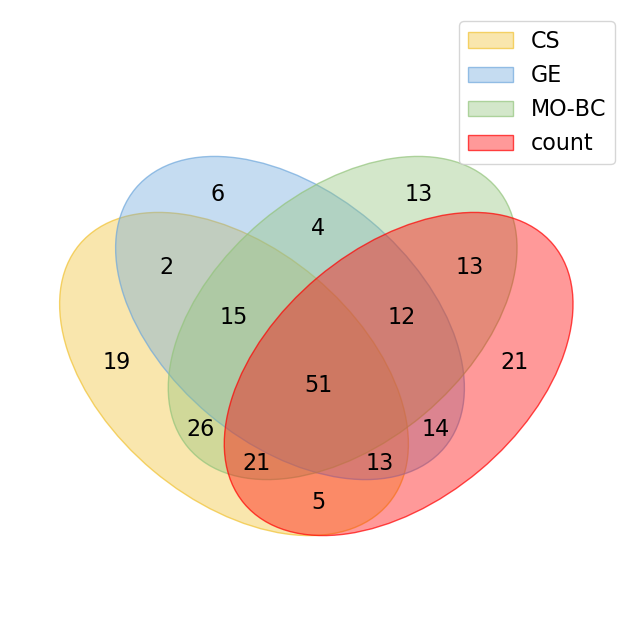

In [37]:
import pandas as pd
from matplotlib import pyplot as plt
from venn import venn

df_dataset = comparison_df
# Assuming 'results' is your DataFrame
# Filtering the DataFrame based on the given criteria
cs = df_dataset[(df_dataset['descriptor'] == 'cp_es_op') & (df_dataset['auc_60'] == True)]
ge = df_dataset[(df_dataset['descriptor'] == 'ge_es_op') & (df_dataset['auc_60'] == True)]
mo = df_dataset[(df_dataset['descriptor'] == 'mobc_es_op') & (df_dataset['auc_60'] == True)]
count = df_dataset[(df_dataset['descriptor'] == 'cell_counter_rule_based') & (df_dataset['auc_60'] == True)]

# Creating sets from the filtered DataFrame
set1 = set(cs['assay_id'])
set2 = set(ge['assay_id'])
set3 = set(mo['assay_id'])
set4 = set(count['assay_id'])

# Creating a dictionary of sets for the Venn diagram
dict_set = {'CS': set1, 'GE': set2, 'MO-BC': set3, 'count': set4}

# Define color map for the Venn diagram
cmap = ["#F1C232", "#6FA8DC", "#93C47C", "red"]

# Plotting the Venn diagram
plt.figure(figsize=(9,9))
venn(dict_set, cmap=cmap, fontsize=16)
plt.show()


<Figure size 900x900 with 0 Axes>

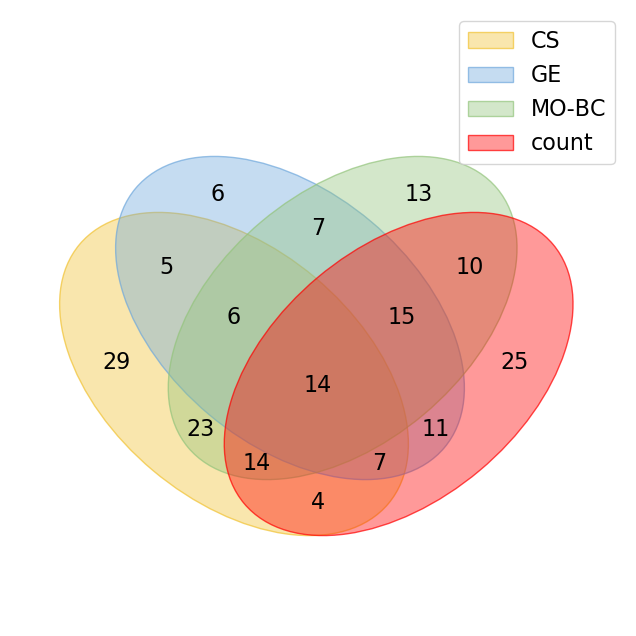

In [38]:
import pandas as pd
from matplotlib import pyplot as plt
from venn import venn

df_dataset = comparison_df
# Assuming 'results' is your DataFrame
# Filtering the DataFrame based on the given criteria
cs = df_dataset[(df_dataset['descriptor'] == 'cp_es_op') & (df_dataset['auc_70'] == True)]
ge = df_dataset[(df_dataset['descriptor'] == 'ge_es_op') & (df_dataset['auc_70'] == True)]
mo = df_dataset[(df_dataset['descriptor'] == 'mobc_es_op') & (df_dataset['auc_70'] == True)]
count = df_dataset[(df_dataset['descriptor'] == 'cell_counter_rule_based') & (df_dataset['auc_70'] == True)]

# Creating sets from the filtered DataFrame
set1 = set(cs['assay_id'])
set2 = set(ge['assay_id'])
set3 = set(mo['assay_id'])
set4 = set(count['assay_id'])

# Creating a dictionary of sets for the Venn diagram
dict_set = {'CS': set1, 'GE': set2, 'MO-BC': set3, 'count': set4}

# Define color map for the Venn diagram
cmap = ["#F1C232", "#6FA8DC", "#93C47C", "red"]

# Plotting the Venn diagram
plt.figure(figsize=(9,9))
venn(dict_set, cmap=cmap, fontsize=16)
plt.show()


<Figure size 900x900 with 0 Axes>

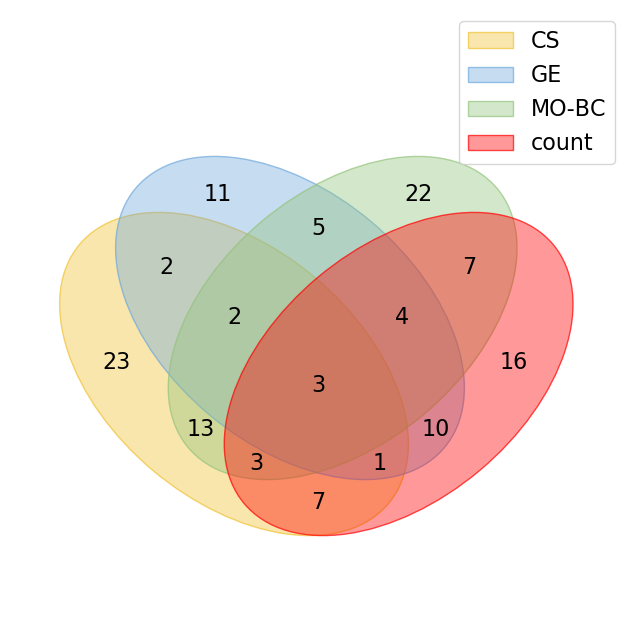

In [39]:
import pandas as pd
from matplotlib import pyplot as plt
from venn import venn

df_dataset = comparison_df
# Assuming 'results' is your DataFrame
# Filtering the DataFrame based on the given criteria
cs = df_dataset[(df_dataset['descriptor'] == 'cp_es_op') & (df_dataset['auc_80'] == True)]
ge = df_dataset[(df_dataset['descriptor'] == 'ge_es_op') & (df_dataset['auc_80'] == True)]
mo = df_dataset[(df_dataset['descriptor'] == 'mobc_es_op') & (df_dataset['auc_80'] == True)]
count = df_dataset[(df_dataset['descriptor'] == 'cell_counter_rule_based') & (df_dataset['auc_80'] == True)]

# Creating sets from the filtered DataFrame
set1 = set(cs['assay_id'])
set2 = set(ge['assay_id'])
set3 = set(mo['assay_id'])
set4 = set(count['assay_id'])

# Creating a dictionary of sets for the Venn diagram
dict_set = {'CS': set1, 'GE': set2, 'MO-BC': set3, 'count': set4}

# Define color map for the Venn diagram
cmap = ["#F1C232", "#6FA8DC", "#93C47C", "red"]

# Plotting the Venn diagram
plt.figure(figsize=(9,9))
venn(dict_set, cmap=cmap, fontsize=16)
plt.show()


In [40]:
# Initialize counters
total_entries = 0
total_valid_entries = 0
total_ones = 0
total_zeros = 0
total_missing_or_invalid = 0

# Process each assay column
for assay in assay_columns:
    total_entries += len(data)
    valid_entries = data[assay].notna() & (data[assay] != -1)
    num_valid_entries = valid_entries.sum()
    total_valid_entries += num_valid_entries
    total_missing_or_invalid += len(data) - num_valid_entries
    
    total_ones += (data.loc[valid_entries, assay] == 1).sum()
    total_zeros += (data.loc[valid_entries, assay] == 0).sum()

# Calculate overall sparsity
overall_sparsity = total_missing_or_invalid / total_entries

# Store the results in a dictionary
overall_results = {
    'Total Entries': total_entries,
    'Valid Entries': total_valid_entries,
    'Missing or Invalid Entries': total_missing_or_invalid,
    'Sparsity': overall_sparsity,
    'Num Ones': total_ones,
    'Num Zeros': total_zeros
}

# Convert results to DataFrame for better display
overall_results_df = pd.DataFrame([overall_results])

# Display the results DataFrame
overall_results_df


,Total Entries,Valid Entries,Missing or Invalid Entries,Sparsity,Num Ones,Num Zeros
0,4365900,585439,3780461,0.865906,15929,569510


In [41]:
data

,smiles,1_1,10_19,10_20,100_277,100_278,104_291,105_355,105_369,105_361,...,Cells_Neighbors_FirstClosestObjectNumber_Adjacent,Cells_Neighbors_SecondClosestObjectNumber_5,Cells_Neighbors_SecondClosestObjectNumber_Adjacent,Cells_Parent_Nuclei,Cytoplasm_Number_Object_Number,Cytoplasm_Parent_Cells,Cytoplasm_Parent_Nuclei,Nuclei_Neighbors_FirstClosestObjectNumber_1,Nuclei_Neighbors_SecondClosestObjectNumber_1,Nuclei_Number_Object_Number
0,CCOC(=O)c1ccc(NC(=S)N2CCSC2c2ccc(OC)cc2)cc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.765625,0.890625,0.890625,1.328125,1.328125,1.328125,1.328125,0.960938,1.320312,1.328125
1,O=C(CC1NC(=O)NC1=O)Nc1cccc2ccccc12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.078125,2.718750,2.718750,2.503906,2.503906,2.503906,2.503906,3.242188,2.578125,2.503906
2,CC(Nc1nc(nc2ccccc12)N1CCCC1)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-7.765625,-8.140625,-8.140625,-8.250000,-8.250000,-8.250000,-8.250000,-7.710938,-7.546875,-8.250000
3,CCCC(Oc1ccc(Br)cc1)c1nc2c3cc(OC)c(OC)cc3nc(S)n2n1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-7.320312,-7.828125,-7.828125,-7.796875,-7.804688,-7.796875,-7.796875,-7.859375,-7.695312,-7.804688
4,CC1=C(C(NC(=O)N1)c1ccc(F)cc1)C(=O)OCc1ccc2OCOc2c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-10.953125,-10.390625,-10.390625,-10.960938,-10.960938,-10.960938,-10.960938,-11.406250,-10.781250,-10.960938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16165,COC(=O)[C@H]1[C@H](CO)[C@H]2Cn3c(=O)c(\C=C\C)c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.039062,-2.031250,-2.031250,-1.550781,-1.550781,-1.550781,-1.550781,-1.546875,-2.945312,-1.550781
16166,C\C=C\c1ccc2n(C[C@H]3[C@H](CO)[C@H](N(C)[C@@H]...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.851562,-0.359375,-0.359375,-0.835938,-0.835938,-0.835938,-0.835938,-1.328125,-0.804688,-0.835938
16167,C\C=C\c1ccc2n(C[C@@H]3[C@@H](CO)[C@@H](N(C)[C@...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.851562,-3.359375,-3.359375,-3.835938,-3.835938,-3.835938,-3.835938,-3.328125,-4.054688,-3.835938
16168,C\C=C\c1ccc2n(C[C@H]3[C@H](CO)[C@@H](C(=O)N[C@...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.039062,-2.460938,-2.460938,-3.300781,-3.300781,-3.300781,-3.300781,-3.382812,-2.937500,-3.300781


In [43]:
15929/(15929+569510)

0.027208641720145053

In [44]:
assay_columns

Index(['1_1', '10_19', '10_20', '100_277', '100_278', '104_291', '105_355',
       '105_369', '105_361', '105_378',
       ...
       '88_252', '88_254', '89_255', '9_14', '9_17', '9_18', '90_256',
       '91_257', '92_258', '93_259'],
      dtype='object', length=270)